**EDA: Exploring the dataset**

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('blood.csv')

# Basic inspection
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Rows:\n", df.head())
print("\nStatistical Summary:\n", df.describe())

Shape: (748, 5)

Columns:
 ['Recency', 'Frequency', 'Monetary', 'Time', 'Class']

Data Types:
 Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Class        int64
dtype: object

Missing Values:
 Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

Sample Rows:
    Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0

Statistical Summary:
           Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.00000

In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Handle missing values
print("Missing values:\n", df.isnull().sum())

# Option 1: Drop rows with missing values (if few)
df_clean = df.dropna()

# Check again
print("After cleaning:", df_clean.isnull().sum())


Duplicate rows: 0
Missing values:
 Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64
After cleaning: Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


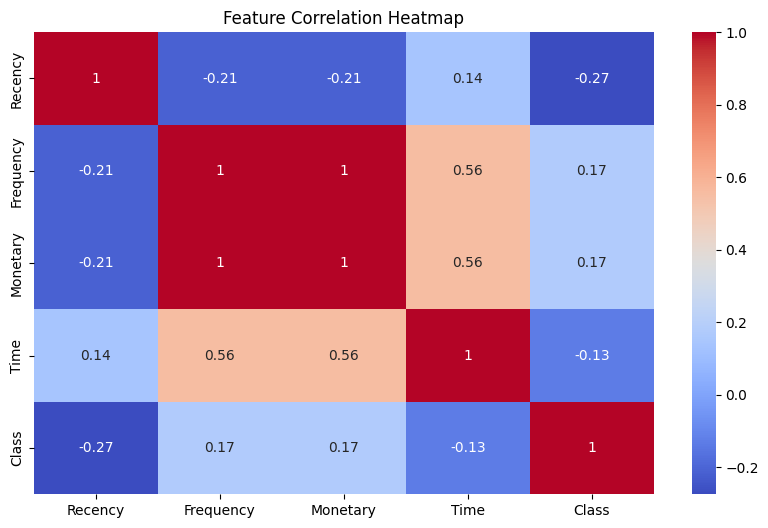

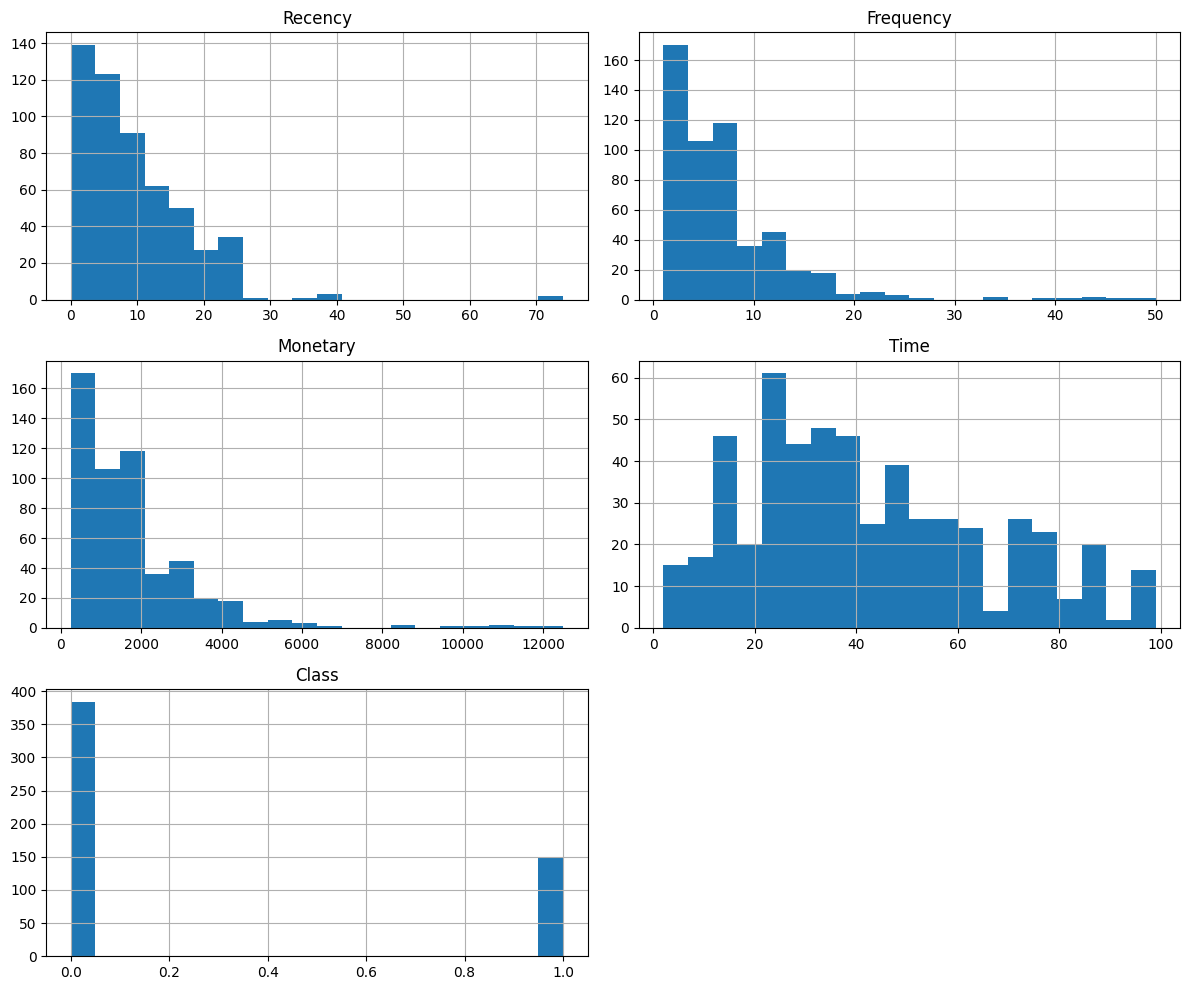

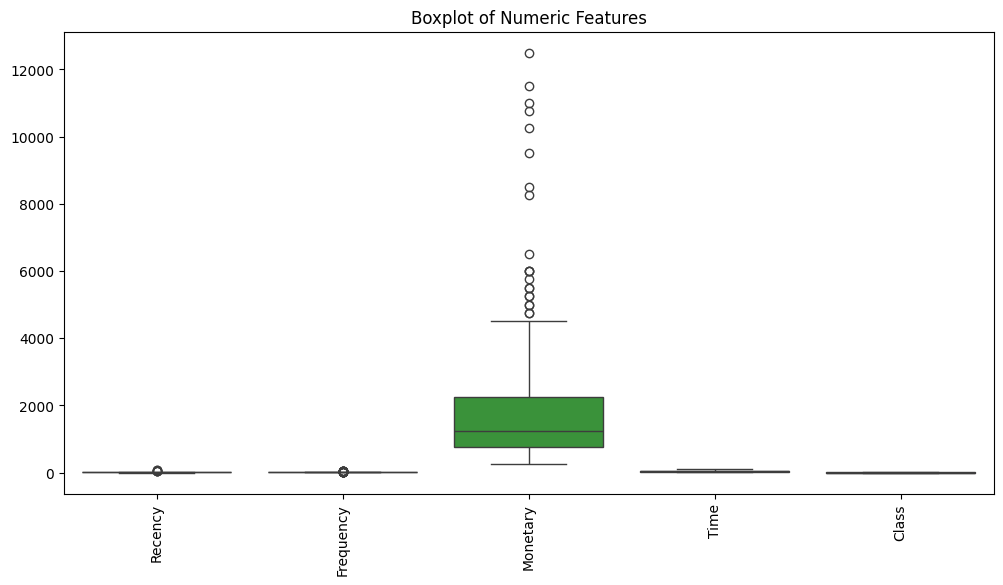

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of numeric features
df_clean.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean)
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Copy the clean DataFrame
df_model = df_clean.copy()

# Step 2: Log-transform 'Monetary' to reduce skew
df_model['Monetary'] = np.log1p(df_model['Monetary'])

# Step 3: Define features and target
X = df_model.drop('Class', axis=1)
y = df_model['Class']

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts())


X_train: (426, 4)
X_test: (107, 4)
y_train value counts:
 Class
0    307
1    119
Name: count, dtype: int64


📊 Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.80      0.96      0.88        77
           1       0.80      0.40      0.53        30

    accuracy                           0.80       107
   macro avg       0.80      0.68      0.70       107
weighted avg       0.80      0.80      0.78       107



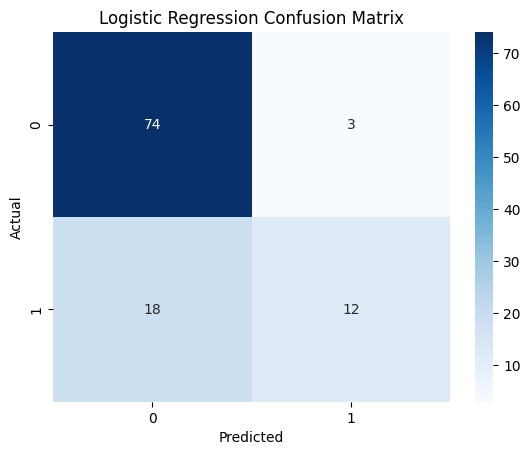

📊 Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        77
           1       0.48      0.47      0.47        30

    accuracy                           0.71       107
   macro avg       0.64      0.64      0.64       107
weighted avg       0.71      0.71      0.71       107



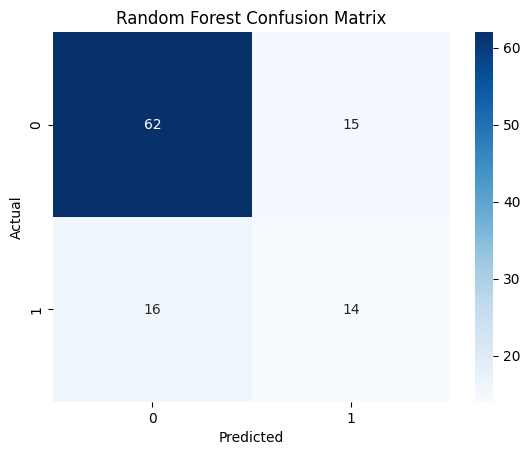

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"📊 {model_name} Classification Report")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate both models
evaluate_model(y_test, lr_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest")


In [11]:
# Mapping predictions to real-world recommendations
recommendation_map = {
    0: "No action needed",
    1: "Regular check-up / Lifestyle guidance"
    # Add more labels if your dataset has more classes
}

# Function to generate recommendation for a new patient
def generate_recommendation(input_data, model):
    # Scale the input data using the same scaler used before
    input_scaled = scaler.transform(input_data)

    # Predict the class
    prediction = model.predict(input_scaled)[0]

    # Map to recommendation
    return recommendation_map.get(prediction, "Unknown")

# Example: Single patient input (replace values accordingly)
import pandas as pd

example_patient = pd.DataFrame([{
    'Recency': 10,
    'Frequency': 4,
    'Monetary': np.log1p(1200),  # remember we log-transformed Monetary
    'Time': 200
}])

# Get recommendation from Random Forest model
recommendation = generate_recommendation(example_patient, rf_model)
print("🩺 Personalized Recommendation:", recommendation)


🩺 Personalized Recommendation: No action needed
